In [4]:
!pip install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install transformers beautifulsoup4 requests numpy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 101.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 24.9 MB/s eta 0:00:00


In [58]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import random

In [7]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [8]:
tokens = tokenizer.encode("almost nice, could have been better, not the best, not the worst, great.", return_tensors='pt')


In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [18]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

 93% 225M/242M [00:01<00:00, 203MB/s]
100% 242M/242M [00:01<00:00, 195MB/s]


In [20]:
import zipfile
zipfile_ref = zipfile.ZipFile("/content/amazon-fine-food-reviews.zip",'r')
zipfile_ref.extractall("/content")
zipfile_ref.close()

In [21]:
df = pd.read_csv("/content/Reviews.csv")
df = df.head(500)
df.shape

(500, 10)

In [24]:
import matplotlib.pyplot as plt

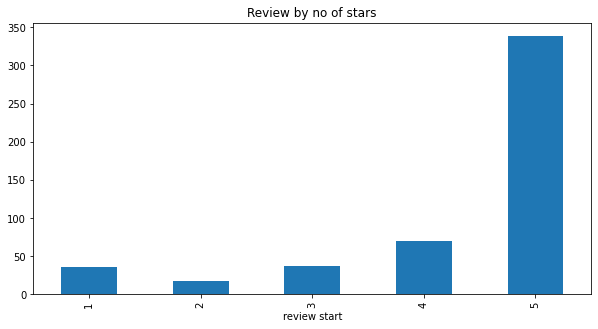

In [25]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Review by no of stars', figsize=(10,5))
ax.set_xlabel("review start")
plt.show()

In [61]:
example = df['Text'][random.randint(0,500)]
print(example)

I have tried other energy shots and this one is the only one that really makes me feel good and energized without any other sides effects at all, its also the best taste, others taste like medicine, this one has a tea fresh taste. I love it.


In [30]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import seaborn as sns 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [62]:
tokens = nltk.word_tokenize(example)
tokens[:20]

['I',
 'have',
 'tried',
 'other',
 'energy',
 'shots',
 'and',
 'this',
 'one',
 'is',
 'the',
 'only',
 'one',
 'that',
 'really',
 'makes',
 'me',
 'feel',
 'good',
 'and']

In [63]:
tagged = nltk.pos_tag(tokens)
tagged[:20]

[('I', 'PRP'),
 ('have', 'VBP'),
 ('tried', 'VBN'),
 ('other', 'JJ'),
 ('energy', 'NN'),
 ('shots', 'NNS'),
 ('and', 'CC'),
 ('this', 'DT'),
 ('one', 'CD'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('only', 'JJ'),
 ('one', 'NN'),
 ('that', 'WDT'),
 ('really', 'RB'),
 ('makes', 'VBZ'),
 ('me', 'PRP'),
 ('feel', 'VB'),
 ('good', 'JJ'),
 ('and', 'CC')]

In [64]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  have/VBP
  tried/VBN
  other/JJ
  energy/NN
  shots/NNS
  and/CC
  this/DT
  one/CD
  is/VBZ
  the/DT
  only/JJ
  one/NN
  that/WDT
  really/RB
  makes/VBZ
  me/PRP
  feel/VB
  good/JJ
  and/CC
  energized/VBN
  without/IN
  any/DT
  other/JJ
  sides/NNS
  effects/NNS
  at/IN
  all/DT
  ,/,
  its/PRP$
  also/RB
  the/DT
  best/JJS
  taste/NN
  ,/,
  others/NNS
  taste/VBP
  like/IN
  medicine/NN
  ,/,
  this/DT
  one/NN
  has/VBZ
  a/DT
  tea/NN
  fresh/JJ
  taste/NN
  ./.
  I/PRP
  love/VBP
  it/PRP
  ./.)


In [65]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [66]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.9661}

In [67]:
tokens = tokenizer.encode(example, return_tensors='pt')

In [68]:
result = model(tokens)

In [69]:
rating = int(torch.argmax(result.logits))+1

In [70]:
rating

5

### SIA Polarity score vs Hugging face review